<a href="https://colab.research.google.com/github/fatimakhan06/PRODOGY_DS_02/blob/main/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the Titanic dataset
titanic = pd.read_csv("train.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
# Drop irrelevant columns for survival prediction
titanic_cleaned = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)

In [10]:
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


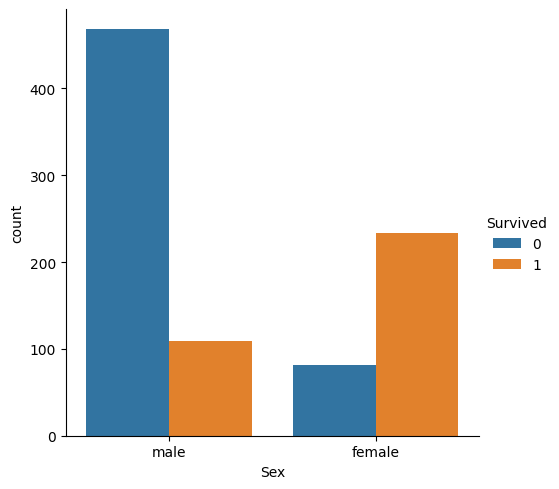

In [11]:
# Explore the relationship between independent and dependent variables (Sex and Survival)
sns.catplot(x='Sex', hue='Survived', kind='count', data=titanic_cleaned)

In [12]:
# Method 2: Using GroupBy to count survival by sex
titanic_cleaned.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='Sex'>

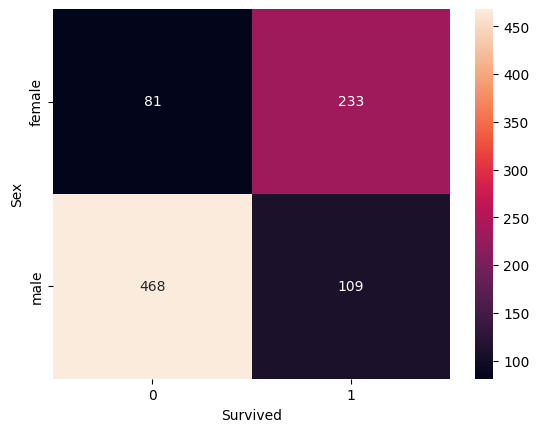

In [13]:
# Method 3: Heatmap for Sex vs Survival
group1 = titanic_cleaned.groupby(['Sex', 'Survived'])
gender_survived = group1.size().unstack()
sns.heatmap(gender_survived, annot=True, fmt="d")

<Axes: xlabel='Survived', ylabel='Pclass'>

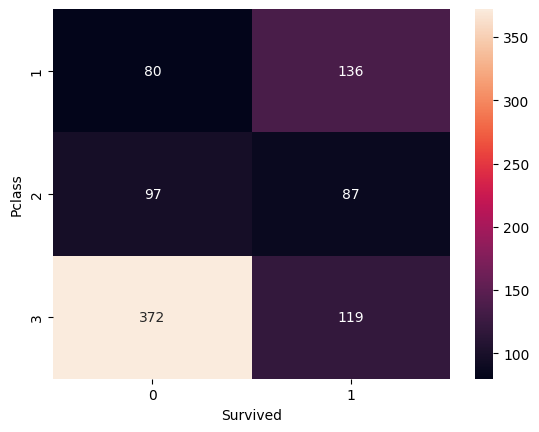

In [14]:
# Heatmap for Pclass vs Survival
group1 = titanic_cleaned.groupby(['Pclass', 'Survived'])
pclass_survived = group1.size().unstack()
sns.heatmap(pclass_survived, annot=True, fmt="d")

<Axes: xlabel='Sex', ylabel='Age'>

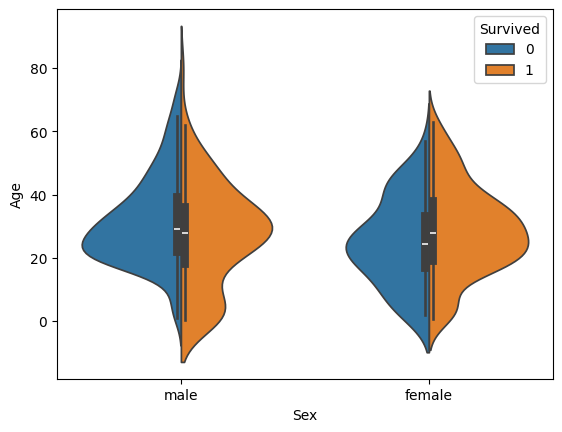

In [15]:
# Violin plot for Age distribution based on Sex and Survival
sns.violinplot(x="Sex", y="Age", hue="Survived", data=titanic_cleaned, split=True)

In [16]:
# Handling missing values in the 'Age' column
print("Oldest person on board:", titanic_cleaned['Age'].max())
print("Youngest person on board:", titanic_cleaned['Age'].min())
print("Average age of people on board:", titanic_cleaned['Age'].mean())

Oldest person on board: 80.0
Youngest person on board: 0.42
Average age of people on board: 29.69911764705882


In [17]:
# Impute missing age values based on Pclass
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 34
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

# Apply the imputation function to the 'Age' column
titanic_cleaned['Age'] = titanic_cleaned[['Age', 'Pclass']].apply(impute, axis=1)

<ipython-input-17-080087bfb8a8>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-17-080087bfb8a8>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [18]:
# Check for missing values after imputation
titanic_cleaned.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Embarked,2
